In [1]:
!pip install gdown  # Ensure gdown is installed

In [2]:
import gdown

# Replace FILE_ID with your actual file ID
file_id = "1u3FwRRFbjSZBfHAOQpykZtWeHGicp6LG"
output_file = "Road_Segmentation_Datasets.zip"

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1u3FwRRFbjSZBfHAOQpykZtWeHGicp6LG
From (redirected): https://drive.google.com/uc?id=1u3FwRRFbjSZBfHAOQpykZtWeHGicp6LG&confirm=t&uuid=94f68a0e-2518-4f7b-bf7d-338af0b3af6e
To: /content/Road_Segmentation_Datasets.zip
100%|██████████| 50.2M/50.2M [00:01<00:00, 26.0MB/s]


'Road_Segmentation_Datasets.zip'

In [3]:
import zipfile
z = zipfile.ZipFile('/content/Road_Segmentation_Datasets.zip')
z.extractall()

In [4]:
import os
import shutil

src = 'Road_Segmentation_Datasets'
dst_dir = 'datasets'
dst = os.path.join(dst_dir, src)

# Create 'datasets' directory if it doesn't exist
os.makedirs(dst_dir, exist_ok=True)

# If 'pothole_datasets' already exists in 'datasets', remove it
if os.path.exists(dst):
    shutil.rmtree(dst)

# Move 'pothole_datasets' to 'datasets'
shutil.move(src, dst)

print(f"Moved '{src}' to '{dst}' successfully.")


Moved 'Road_Segmentation_Datasets' to 'datasets/Road_Segmentation_Datasets' successfully.


## **Importing libraries**

In [5]:
import yaml

# Define YAML configuration
data = {
    'path': 'Road_Segmentation_Datasets',
    'train': 'train/images',
    'val': 'valid/images',
    'test': 'test/images',
    'nc': 3,
    'names': ['Left Curve','Right Curve','UTurn']
}

# Save to pothole.yaml
with open('Road_Segmentation_Datasets.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("Road_Segmentation_Datasets.yaml created successfully!")


Road_Segmentation_Datasets.yaml created successfully!


In [6]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [7]:
from ultralytics import YOLO

# Load a pretrained YOLOv8 model
model = YOLO('yolo11l-seg.pt')  # 'yolov8s.pt' or 'yolov8m.pt' for better accuracy

# Train the model and save only the best checkpoint


# Train the model with data augmentation
model.train(
    data='Road_Segmentation_Datasets.yaml',
    epochs=100,
    imgsz=640,
    batch=8,
    name='Road_Segmentation_Datasets_yolov8',
    save=True,
    save_period=-1,
    patience=20,
    val=True,

    # Augmentation hyperparameters
    degrees=10,        # Rotation in degrees
    translate=0.1,     # Translate by fraction of image size (0.1 = 10%)
    scale=0.5,         # Scale image (0.5 means 50% zoom in/out)
    shear=2.0,         # Shear angle
    perspective=0.001, # Perspective transformation
    flipud=0.5,        # Vertical flip probability
    fliplr=0.5,        # Horizontal flip probability
    hsv_h=0.015,       # HSV hue augmentation
    hsv_s=0.7,         # HSV saturation augmentation
    hsv_v=0.4          # HSV value augmentation
)




Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 53.5M/53.5M [00:00<00:00, 158MB/s]


Ultralytics 8.3.129 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Road_Segmentation_Datasets.yaml, degrees=10, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11l-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=Road_Segmentation_Datasets_yolov8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.001

100%|██████████| 755k/755k [00:00<00:00, 23.1MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  2    173824  ultralytics.nn.modules.block.C3k2            [128, 256, 2, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  2    691712  ultralytics.nn.modules.block.C3k2            [256, 512, 2, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  2   2234368  ultralytics.nn.modules.block.C3k2            [512, 512, 2, True]           
  7                  -1  1   2360320  ultralytics

  8                  -1  2   2234368  ultralytics.nn.modules.block.C3k2            [512, 512, 2, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  2   1455616  ultralytics.nn.modules.block.C2PSA           [512, 512, 2]                 
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  2   2496512  ultralytics.nn.modules.block.C3k2            [1024, 512, 2, True]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  2    756736  ultralytics.nn.modules.block.C3k2            [1024

100%|██████████| 5.35M/5.35M [00:00<00:00, 87.8MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 25.4±5.1 MB/s, size: 66.4 KB)


train: Scanning /content/datasets/Road_Segmentation_Datasets/train/labels... 493 images, 3 backgrounds, 0 corrupt: 100%|██████████| 493/493 [00:00<00:00, 508.64it/s]

train: New cache created: /content/datasets/Road_Segmentation_Datasets/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 29.3±31.9 MB/s, size: 60.6 KB)


val: Scanning /content/datasets/Road_Segmentation_Datasets/valid/labels... 140 images, 2 backgrounds, 0 corrupt: 100%|██████████| 140/140 [00:00<00:00, 387.54it/s]

val: New cache created: /content/datasets/Road_Segmentation_Datasets/valid/labels.cache


Plotting labels to runs/segment/Road_Segmentation_Datasets_yolov8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 176 weight(decay=0.0), 187 weight(decay=0.0005), 186 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/Road_Segmentation_Datasets_yolov8
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.27G      1.133      2.438       2.35       1.57          8        640: 100%|██████████| 62/62 [00:34<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.42it/s]

                   all        140        142    0.00338     0.0602    0.00129   0.000878    0.00336     0.0533    0.00127   0.000763



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.43G       1.25      1.819      1.879      1.593         11        640: 100%|██████████| 62/62 [00:31<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.48it/s]

                   all        140        142     0.0343     0.0771       0.02    0.00715      0.028      0.065     0.0161    0.00311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.24G      1.332      1.964      1.734       1.64         13        640: 100%|██████████| 62/62 [00:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.64it/s]

                   all        140        142      0.131      0.256     0.0939     0.0402      0.137      0.242     0.0938     0.0393



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.21G      1.289      1.845       1.82      1.603         15        640: 100%|██████████| 62/62 [00:30<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        140        142      0.813      0.174      0.312      0.198      0.801       0.16      0.292      0.183



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.24G      1.239      1.728      1.665      1.589         14        640: 100%|██████████| 62/62 [00:30<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.39it/s]

                   all        140        142       0.25      0.627      0.324      0.173      0.246      0.604      0.301      0.192



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.23G      1.119      1.733      1.594      1.515         14        640: 100%|██████████| 62/62 [00:30<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.43it/s]

                   all        140        142      0.235      0.682      0.367      0.187      0.234      0.676      0.362      0.205



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.23G      1.127      1.695      1.565      1.504         14        640: 100%|██████████| 62/62 [00:30<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.64it/s]

                   all        140        142      0.278      0.562      0.368      0.273      0.274      0.537      0.365      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100       6.2G      1.079      1.593      1.472      1.472         13        640: 100%|██████████| 62/62 [00:30<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]

                   all        140        142      0.315      0.641      0.428      0.291      0.287      0.597      0.382      0.243



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.24G      1.053      1.555      1.484      1.453         11        640: 100%|██████████| 62/62 [00:30<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.41it/s]

                   all        140        142      0.675      0.377      0.462       0.34       0.65      0.356      0.444      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.23G      1.003      1.486      1.455      1.403         12        640: 100%|██████████| 62/62 [00:30<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all        140        142      0.333      0.779      0.476      0.367      0.327      0.766      0.465      0.334



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.22G          1      1.444      1.486      1.418         12        640: 100%|██████████| 62/62 [00:30<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.66it/s]

                   all        140        142      0.287      0.886      0.484      0.371      0.275      0.835      0.455      0.365



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.23G      1.004      1.543      1.477      1.404         13        640: 100%|██████████| 62/62 [00:30<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.40it/s]

                   all        140        142      0.262      0.628      0.302      0.244      0.246      0.563      0.285      0.192



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.24G      1.016      1.405      1.467      1.418         10        640: 100%|██████████| 62/62 [00:30<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all        140        142      0.403      0.716      0.502      0.347      0.375      0.684      0.469      0.364



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.23G     0.9258      1.414      1.358      1.353         12        640: 100%|██████████| 62/62 [00:30<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.48it/s]

                   all        140        142      0.321      0.822      0.471       0.36      0.312      0.791      0.452      0.364



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.26G     0.9403      1.359       1.39      1.362         18        640: 100%|██████████| 62/62 [00:30<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.66it/s]

                   all        140        142      0.431      0.729      0.512      0.387      0.397       0.71      0.483      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100       6.2G     0.9477      1.427      1.366      1.386         15        640: 100%|██████████| 62/62 [00:30<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.64it/s]

                   all        140        142      0.384      0.704      0.503      0.404      0.381      0.695       0.49      0.385



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.23G     0.8802      1.325      1.325      1.327         13        640: 100%|██████████| 62/62 [00:30<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]

                   all        140        142       0.58      0.472      0.377      0.296      0.559      0.417      0.331      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.23G     0.8708      1.336      1.345      1.324         15        640: 100%|██████████| 62/62 [00:30<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.67it/s]

                   all        140        142      0.529      0.713      0.502      0.422      0.526      0.705      0.494      0.425



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.23G     0.8623      1.241      1.327      1.309         12        640: 100%|██████████| 62/62 [00:30<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all        140        142      0.262      0.856      0.455      0.367      0.245      0.816      0.429      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.21G     0.8823      1.212      1.295      1.316         16        640: 100%|██████████| 62/62 [00:30<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]

                   all        140        142       0.46      0.785       0.55      0.459      0.454      0.782      0.541      0.432



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.23G     0.9032      1.319      1.285      1.347         18        640: 100%|██████████| 62/62 [00:30<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all        140        142      0.529       0.69      0.455      0.364      0.525      0.683      0.448      0.358



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.23G     0.8792      1.244      1.252      1.334         14        640: 100%|██████████| 62/62 [00:29<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.48it/s]

                   all        140        142      0.238      0.448      0.379      0.293       0.23      0.433      0.362      0.247



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.22G     0.8549      1.141      1.281      1.301         17        640: 100%|██████████| 62/62 [00:29<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.66it/s]

                   all        140        142      0.456      0.736      0.552      0.462      0.527      0.711      0.549      0.466



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100       6.2G     0.8581      1.158       1.26      1.291         15        640: 100%|██████████| 62/62 [00:29<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.68it/s]

                   all        140        142      0.393      0.856      0.568      0.443      0.375      0.821       0.52      0.413



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.23G     0.8827      1.166      1.244      1.322         15        640: 100%|██████████| 62/62 [00:30<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.66it/s]

                   all        140        142       0.34      0.796      0.563      0.479      0.334      0.782      0.546      0.468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.22G     0.8285      1.248      1.252      1.302         11        640: 100%|██████████| 62/62 [00:30<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.65it/s]

                   all        140        142      0.377      0.874      0.579      0.474      0.361      0.859      0.563      0.467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.22G     0.7817      1.121      1.237      1.269         15        640: 100%|██████████| 62/62 [00:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all        140        142      0.438      0.668      0.557      0.477      0.434      0.661      0.544      0.452



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.23G     0.8089      1.256      1.285      1.268         13        640: 100%|██████████| 62/62 [00:30<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        140        142       0.37      0.817      0.548      0.465      0.342      0.775      0.497      0.413



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.23G     0.7743      1.154       1.25      1.255         14        640: 100%|██████████| 62/62 [00:30<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all        140        142      0.426       0.76       0.56      0.485      0.423      0.753      0.553      0.466



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.23G     0.7475      1.061      1.184      1.261         14        640: 100%|██████████| 62/62 [00:29<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all        140        142      0.432      0.751      0.574      0.501      0.435      0.757      0.579      0.434



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.23G     0.8008      1.132      1.223      1.261          7        640: 100%|██████████| 62/62 [00:30<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.69it/s]

                   all        140        142      0.433      0.631      0.524      0.439      0.433      0.641      0.523      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100       6.2G     0.7512      1.092      1.205      1.242         18        640: 100%|██████████| 62/62 [00:30<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.67it/s]

                   all        140        142       0.54      0.566      0.514      0.443      0.532      0.559      0.506      0.403



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.23G      0.761      1.083      1.215      1.236         14        640: 100%|██████████| 62/62 [00:30<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        140        142       0.49      0.632      0.561       0.46      0.471      0.674      0.562      0.446



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.22G     0.7451      1.073      1.166      1.244         11        640: 100%|██████████| 62/62 [00:29<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all        140        142      0.426      0.834      0.656      0.554      0.423      0.827      0.649      0.546



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.22G     0.7536      1.045      1.149      1.239         16        640: 100%|██████████| 62/62 [00:30<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.66it/s]

                   all        140        142      0.337      0.848      0.595      0.498      0.338      0.853      0.592       0.51



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100       6.2G     0.7372          1      1.114      1.217         13        640: 100%|██████████| 62/62 [00:30<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.67it/s]

                   all        140        142      0.478        0.7      0.595      0.513       0.47        0.7      0.576      0.493



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.22G     0.7401      1.103      1.137      1.239         15        640: 100%|██████████| 62/62 [00:30<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.67it/s]

                   all        140        142      0.347      0.707      0.587      0.525      0.352      0.733      0.585      0.503



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.23G     0.7183     0.9978       1.12      1.208         11        640: 100%|██████████| 62/62 [00:29<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        140        142      0.498      0.727      0.619      0.553      0.498      0.727       0.62      0.545



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.22G     0.7398      1.033      1.171      1.227         12        640: 100%|██████████| 62/62 [00:30<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all        140        142      0.418       0.89      0.611      0.542      0.418       0.89      0.611       0.52



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100       6.2G      0.745      1.041      1.168      1.217         16        640: 100%|██████████| 62/62 [00:29<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.64it/s]

                   all        140        142      0.434      0.869      0.638       0.53      0.432      0.852      0.638      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.23G     0.7163     0.9951      1.151      1.227          9        640: 100%|██████████| 62/62 [00:30<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.65it/s]

                   all        140        142      0.492      0.788      0.608      0.514      0.492      0.788      0.608      0.512



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.22G     0.7002     0.9861      1.114      1.193         20        640: 100%|██████████| 62/62 [00:30<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.65it/s]

                   all        140        142      0.361      0.843      0.628      0.549      0.357      0.829       0.62      0.506



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.22G     0.7262      1.024      1.167      1.227         13        640: 100%|██████████| 62/62 [00:30<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.47it/s]

                   all        140        142      0.476      0.696      0.666      0.584      0.476      0.696      0.666      0.575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100       6.2G     0.7138     0.9832      1.116      1.205         16        640: 100%|██████████| 62/62 [00:29<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.46it/s]

                   all        140        142      0.424      0.769      0.626      0.537      0.421      0.762      0.618      0.508



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.24G     0.7306      1.034      1.127      1.225         11        640: 100%|██████████| 62/62 [00:30<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all        140        142      0.465      0.853      0.673      0.581      0.464      0.843      0.661      0.545



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.23G     0.7163      1.079      1.102      1.218         13        640: 100%|██████████| 62/62 [00:30<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.65it/s]

                   all        140        142      0.449      0.833      0.632      0.564      0.447      0.826      0.625      0.549



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.22G      0.701     0.9948      1.089        1.2         19        640: 100%|██████████| 62/62 [00:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.66it/s]

                   all        140        142       0.54      0.821      0.719      0.584      0.562      0.786      0.731      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100       6.2G     0.6971     0.9149       1.09      1.194         17        640: 100%|██████████| 62/62 [00:30<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.67it/s]

                   all        140        142       0.54      0.711      0.739      0.636      0.549      0.719      0.757      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.23G     0.6965     0.9797      1.029      1.199         14        640: 100%|██████████| 62/62 [00:30<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all        140        142      0.491      0.787      0.735      0.634      0.491      0.787      0.734      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.22G     0.6568     0.9151      1.023      1.171         11        640: 100%|██████████| 62/62 [00:29<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.48it/s]

                   all        140        142      0.593      0.599      0.686      0.587      0.585      0.593      0.671      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.23G     0.6945     0.9405      1.061      1.214         13        640: 100%|██████████| 62/62 [00:30<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.66it/s]

                   all        140        142      0.559      0.828      0.754      0.625      0.559      0.828      0.754       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100       6.2G      0.657     0.8461      1.015      1.173         10        640: 100%|██████████| 62/62 [00:30<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.67it/s]

                   all        140        142      0.465        0.8      0.686      0.578       0.46      0.793      0.677      0.576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.23G     0.6738     0.8861      1.038       1.18         15        640: 100%|██████████| 62/62 [00:30<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.64it/s]

                   all        140        142      0.532      0.802      0.724      0.651      0.527      0.795      0.718      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      6.23G     0.6611     0.9046      1.073      1.186         14        640: 100%|██████████| 62/62 [00:30<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]

                   all        140        142      0.475      0.884      0.717      0.631      0.469       0.89      0.713      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.26G      0.682     0.9834      1.102      1.202         10        640: 100%|██████████| 62/62 [00:30<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all        140        142      0.539      0.716      0.694      0.608      0.551       0.73      0.703      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100       6.2G     0.6699      0.904      1.087      1.187         13        640: 100%|██████████| 62/62 [00:29<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.69it/s]

                   all        140        142       0.55      0.597      0.656      0.575       0.55      0.597      0.656       0.57



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.23G     0.6497     0.9006      1.035      1.168         12        640: 100%|██████████| 62/62 [00:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.67it/s]

                   all        140        142      0.716      0.557      0.718       0.64      0.716      0.557      0.714      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.25G     0.6636     0.8799      1.043      1.183         13        640: 100%|██████████| 62/62 [00:30<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.66it/s]

                   all        140        142       0.54      0.805      0.717      0.619      0.535      0.798      0.711        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.23G     0.6423     0.8469      1.008      1.163         11        640: 100%|██████████| 62/62 [00:30<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        140        142      0.563      0.849      0.744      0.635      0.563      0.849       0.74      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100       6.2G     0.6364     0.8822      0.998      1.167         12        640: 100%|██████████| 62/62 [00:29<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all        140        142      0.629      0.753      0.702       0.59      0.629      0.753      0.714        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.23G     0.6623     0.8654     0.9952      1.175         13        640: 100%|██████████| 62/62 [00:30<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.68it/s]

                   all        140        142      0.522      0.707       0.67      0.575      0.522      0.707      0.667      0.578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.22G     0.6448     0.8394     0.9798      1.161         14        640: 100%|██████████| 62/62 [00:30<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.65it/s]

                   all        140        142      0.538      0.759      0.686      0.575      0.538      0.759      0.686      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.23G     0.6616      0.898      1.013      1.166         16        640: 100%|██████████| 62/62 [00:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.71it/s]

                   all        140        142      0.639      0.718      0.721      0.613      0.639      0.718      0.717      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100       6.2G     0.6286     0.8618     0.9915      1.142         15        640: 100%|██████████| 62/62 [00:29<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.46it/s]

                   all        140        142      0.494      0.811      0.721       0.63      0.491      0.804      0.716      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.23G     0.6533     0.9071      1.015      1.185         16        640: 100%|██████████| 62/62 [00:29<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all        140        142      0.562      0.881      0.762      0.658      0.561      0.876      0.757      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.22G     0.6231     0.8115     0.9875      1.156         20        640: 100%|██████████| 62/62 [00:30<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.65it/s]

                   all        140        142      0.542       0.81      0.728      0.642      0.542       0.81      0.728      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.23G     0.6287     0.8046      0.973      1.139         13        640: 100%|██████████| 62/62 [00:30<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.69it/s]

                   all        140        142      0.537      0.845      0.743      0.649      0.537      0.845      0.739      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100       6.2G     0.6371     0.8538      1.011      1.153         16        640: 100%|██████████| 62/62 [00:30<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.66it/s]

                   all        140        142      0.501      0.847      0.727      0.632      0.501      0.847      0.725      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.24G     0.6043     0.8274     0.9409      1.161         10        640: 100%|██████████| 62/62 [00:30<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.48it/s]

                   all        140        142      0.656      0.834      0.799      0.699      0.656      0.834      0.799      0.684



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.23G     0.6064     0.7916     0.9205      1.138         13        640: 100%|██████████| 62/62 [00:29<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        140        142      0.688      0.717      0.815      0.684      0.665      0.708      0.797      0.681



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.22G     0.6275     0.8141     0.9571      1.164         16        640: 100%|██████████| 62/62 [00:29<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all        140        142      0.599      0.776      0.757      0.658      0.599      0.776      0.741      0.647



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100       6.2G     0.6191     0.8258     0.9578       1.15         18        640: 100%|██████████| 62/62 [00:29<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.66it/s]

                   all        140        142      0.543      0.815      0.713      0.639      0.537      0.808        0.7      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.23G     0.6117      0.801      0.918      1.141         14        640: 100%|██████████| 62/62 [00:30<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.65it/s]

                   all        140        142       0.64      0.794      0.791      0.707       0.64      0.794      0.791      0.686



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.25G     0.6076     0.8133     0.9255      1.139         11        640: 100%|██████████| 62/62 [00:30<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.66it/s]

                   all        140        142      0.552      0.748      0.709      0.622      0.552      0.748      0.709       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.22G     0.5822     0.7593     0.9066      1.128         14        640: 100%|██████████| 62/62 [00:29<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        140        142      0.529       0.67        0.7      0.601      0.525      0.664        0.7      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100       6.2G      0.558     0.7768     0.8986      1.115         11        640: 100%|██████████| 62/62 [00:29<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all        140        142      0.759      0.856       0.86      0.753      0.759      0.856      0.859      0.741



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.23G      0.565     0.7677      0.887      1.113         13        640: 100%|██████████| 62/62 [00:29<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all        140        142      0.685      0.834       0.78      0.672      0.685      0.834      0.775      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.22G     0.5829     0.7514     0.9186      1.126         15        640: 100%|██████████| 62/62 [00:29<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.66it/s]

                   all        140        142      0.565      0.835      0.748      0.634      0.561      0.828      0.747      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.25G     0.5683     0.7841     0.9197      1.106         15        640: 100%|██████████| 62/62 [00:30<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.66it/s]

                   all        140        142      0.651      0.792      0.764      0.663      0.651      0.792      0.764      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100       6.2G     0.5819     0.8375      0.928      1.145         14        640: 100%|██████████| 62/62 [00:30<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.68it/s]

                   all        140        142      0.599      0.803      0.784        0.7      0.599      0.803      0.784      0.694



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.23G       0.59     0.7381     0.9015      1.127         13        640: 100%|██████████| 62/62 [00:30<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]

                   all        140        142      0.685      0.752      0.781      0.691      0.685      0.752      0.781      0.682



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.22G     0.5591     0.7514     0.8948       1.11         14        640: 100%|██████████| 62/62 [00:29<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all        140        142      0.568      0.796      0.717       0.64      0.568      0.796      0.717      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.26G     0.5772     0.7635     0.8611      1.113         12        640: 100%|██████████| 62/62 [00:29<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.67it/s]

                   all        140        142      0.654      0.831      0.832      0.758      0.654      0.831      0.832      0.747



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100       6.2G     0.5737     0.7767     0.9083      1.119         11        640: 100%|██████████| 62/62 [00:29<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.47it/s]

                   all        140        142      0.701      0.807      0.808      0.729      0.701      0.807      0.808      0.721



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.22G     0.5929     0.7888     0.8965      1.126         14        640: 100%|██████████| 62/62 [00:29<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all        140        142       0.65       0.82       0.78      0.695       0.65       0.82       0.78      0.688



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.22G     0.5436     0.7182      0.866      1.103         12        640: 100%|██████████| 62/62 [00:29<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.67it/s]

                   all        140        142      0.625      0.853      0.801      0.725      0.625      0.853        0.8      0.706



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.22G      0.556     0.6946      0.836      1.113         12        640: 100%|██████████| 62/62 [00:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.66it/s]

                   all        140        142      0.685      0.857       0.82      0.737      0.685      0.857      0.819      0.728



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100       6.2G     0.5063      0.653     0.8036      1.075         17        640: 100%|██████████| 62/62 [00:30<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.67it/s]

                   all        140        142      0.679      0.869      0.803      0.712      0.679      0.869      0.803      0.708



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.23G     0.5256      0.702     0.8088       1.09         14        640: 100%|██████████| 62/62 [00:29<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        140        142      0.744      0.838      0.831      0.744      0.744      0.838      0.827       0.74



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.23G     0.5461      0.747     0.8457      1.112         13        640: 100%|██████████| 62/62 [00:29<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all        140        142      0.749      0.887      0.858      0.775      0.749      0.887      0.858      0.778


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      6.23G     0.3696     0.6288     0.6595      1.122          5        640: 100%|██████████| 62/62 [00:30<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.66it/s]

                   all        140        142      0.794      0.796      0.842      0.743      0.794      0.796      0.841      0.735



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.21G     0.3758     0.5763     0.5576      1.154          5        640: 100%|██████████| 62/62 [00:29<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.68it/s]

                   all        140        142      0.805      0.826      0.838      0.747      0.805      0.826      0.837      0.741



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.24G     0.3705     0.6042      0.602      1.146          5        640: 100%|██████████| 62/62 [00:29<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.68it/s]

                   all        140        142      0.701      0.899      0.831      0.725      0.733      0.824      0.825      0.723



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.23G     0.3674     0.5388     0.5177      1.131          5        640: 100%|██████████| 62/62 [00:29<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        140        142      0.755      0.875      0.852      0.761      0.755      0.875      0.852      0.751



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.23G     0.3385     0.5401     0.4884      1.112          5        640: 100%|██████████| 62/62 [00:29<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all        140        142      0.762      0.835      0.869      0.793      0.762      0.835      0.869       0.78



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100       6.2G     0.3354     0.5154     0.5003      1.103          5        640: 100%|██████████| 62/62 [00:29<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.66it/s]

                   all        140        142      0.809      0.853      0.892      0.822      0.809      0.853       0.89      0.805



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.23G     0.3301     0.5066     0.5021      1.102          5        640: 100%|██████████| 62/62 [00:30<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all        140        142       0.81      0.824      0.871      0.799       0.81      0.824      0.869      0.784



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.23G     0.3435     0.4916     0.4918      1.105          5        640: 100%|██████████| 62/62 [00:30<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.67it/s]

                   all        140        142      0.782      0.849       0.86      0.777      0.782      0.849       0.86      0.769



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.23G     0.3354     0.5469     0.5028      1.107          5        640: 100%|██████████| 62/62 [00:30<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.66it/s]

                   all        140        142      0.754      0.834       0.86      0.774      0.754      0.834      0.859      0.765



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      6.21G     0.3116     0.4852     0.4454      1.084          5        640: 100%|██████████| 62/62 [00:29<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.46it/s]

                   all        140        142      0.813      0.821      0.882      0.792      0.813      0.821      0.882      0.785



100 epochs completed in 0.989 hours.
Optimizer stripped from runs/segment/Road_Segmentation_Datasets_yolov8/weights/last.pt, 55.8MB
Optimizer stripped from runs/segment/Road_Segmentation_Datasets_yolov8/weights/best.pt, 55.8MB

Validating runs/segment/Road_Segmentation_Datasets_yolov8/weights/best.pt...
Ultralytics 8.3.129 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l-seg summary (fused): 203 layers, 27,586,905 parameters, 0 gradients, 141.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.67it/s]


                   all        140        142      0.821      0.853      0.892      0.822      0.821      0.853       0.89      0.805
            Left Curve         48         48      0.825      0.938      0.957      0.921      0.825      0.938      0.956        0.9
           Right Curve         39         39       0.78      0.641       0.77      0.637       0.78      0.641      0.766      0.639
                 UTurn         55         55      0.858      0.982      0.949      0.908      0.858      0.982      0.949      0.875
Speed: 0.4ms preprocess, 19.2ms inference, 0.2ms loss, 4.0ms postprocess per image
Results saved to runs/segment/Road_Segmentation_Datasets_yolov8


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cf99ffe2d50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04

In [ ]:
import numpy as np

def draw_segmentation(image, mask, class_colors):

    # Define transparency level (0 to 1)
    alpha = 0.5  # 50% transparency

    # Create a colored overlay of the same shape as the image
    overlay = np.zeros_like(image, dtype=np.uint8)

    for class_id in range(len(class_colors)):
        # if class_id == 0:
        #     continue  # Skip background class
        class_mask = (mask == class_id)
        color = class_colors[class_id]
        overlay[class_mask] = color

    # ✅ Fixed: Convert PIL image to NumPy before resizing
    image = np.array(image)  # Convert PIL to NumPy

    # Create a copy to preserve original image
    blended_image = image.copy()

    # Blend for all class masks
    for class_id in range(len(class_colors)):
        # if class_id == 0:
        #     continue
        class_mask = (mask == class_id + 1)
        for c in range(3):  # For each color channel
            blended_image[..., c][class_mask] = (
                image[..., c][class_mask] * (1 - alpha) +
                overlay[..., c][class_mask] * alpha
            ).astype(np.uint8)

    return blended_image

{0: 'Left Curve', 1: 'Right Curve', 2: 'UTurn'}

image 1/1 /content/datasets/Road_Segmentation_Datasets/test/images/IMG-20230320-WA0132_jpg.rf.66e468fda7111b80c99e80c8b8afed22.jpg: 640x640 1 Left Curve, 1 Right Curve, 60.8ms
Speed: 1.9ms preprocess, 60.8ms inference, 17.1ms postprocess per image at shape (1, 3, 640, 640)
Unique pixel values in the mask: [          0           1]
Unique pixel values in the mask: [          0           1]

image 1/1 /content/datasets/Road_Segmentation_Datasets/test/images/IMG_0685_jpeg.rf.3e3af8ce1a84680c148ed20bcd97a4e1.jpg: 640x640 1 UTurn, 42.2ms
Speed: 1.6ms preprocess, 42.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Unique pixel values in the mask: [          0           1]

image 1/1 /content/datasets/Road_Segmentation_Datasets/test/images/IMG-20230127-WA0013_jpg.rf.a922b1131e4aaa9c4f2faad813fb7316.jpg: 640x640 1 Left Curve, 42.3ms
Speed: 2.3ms preprocess, 42.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 64

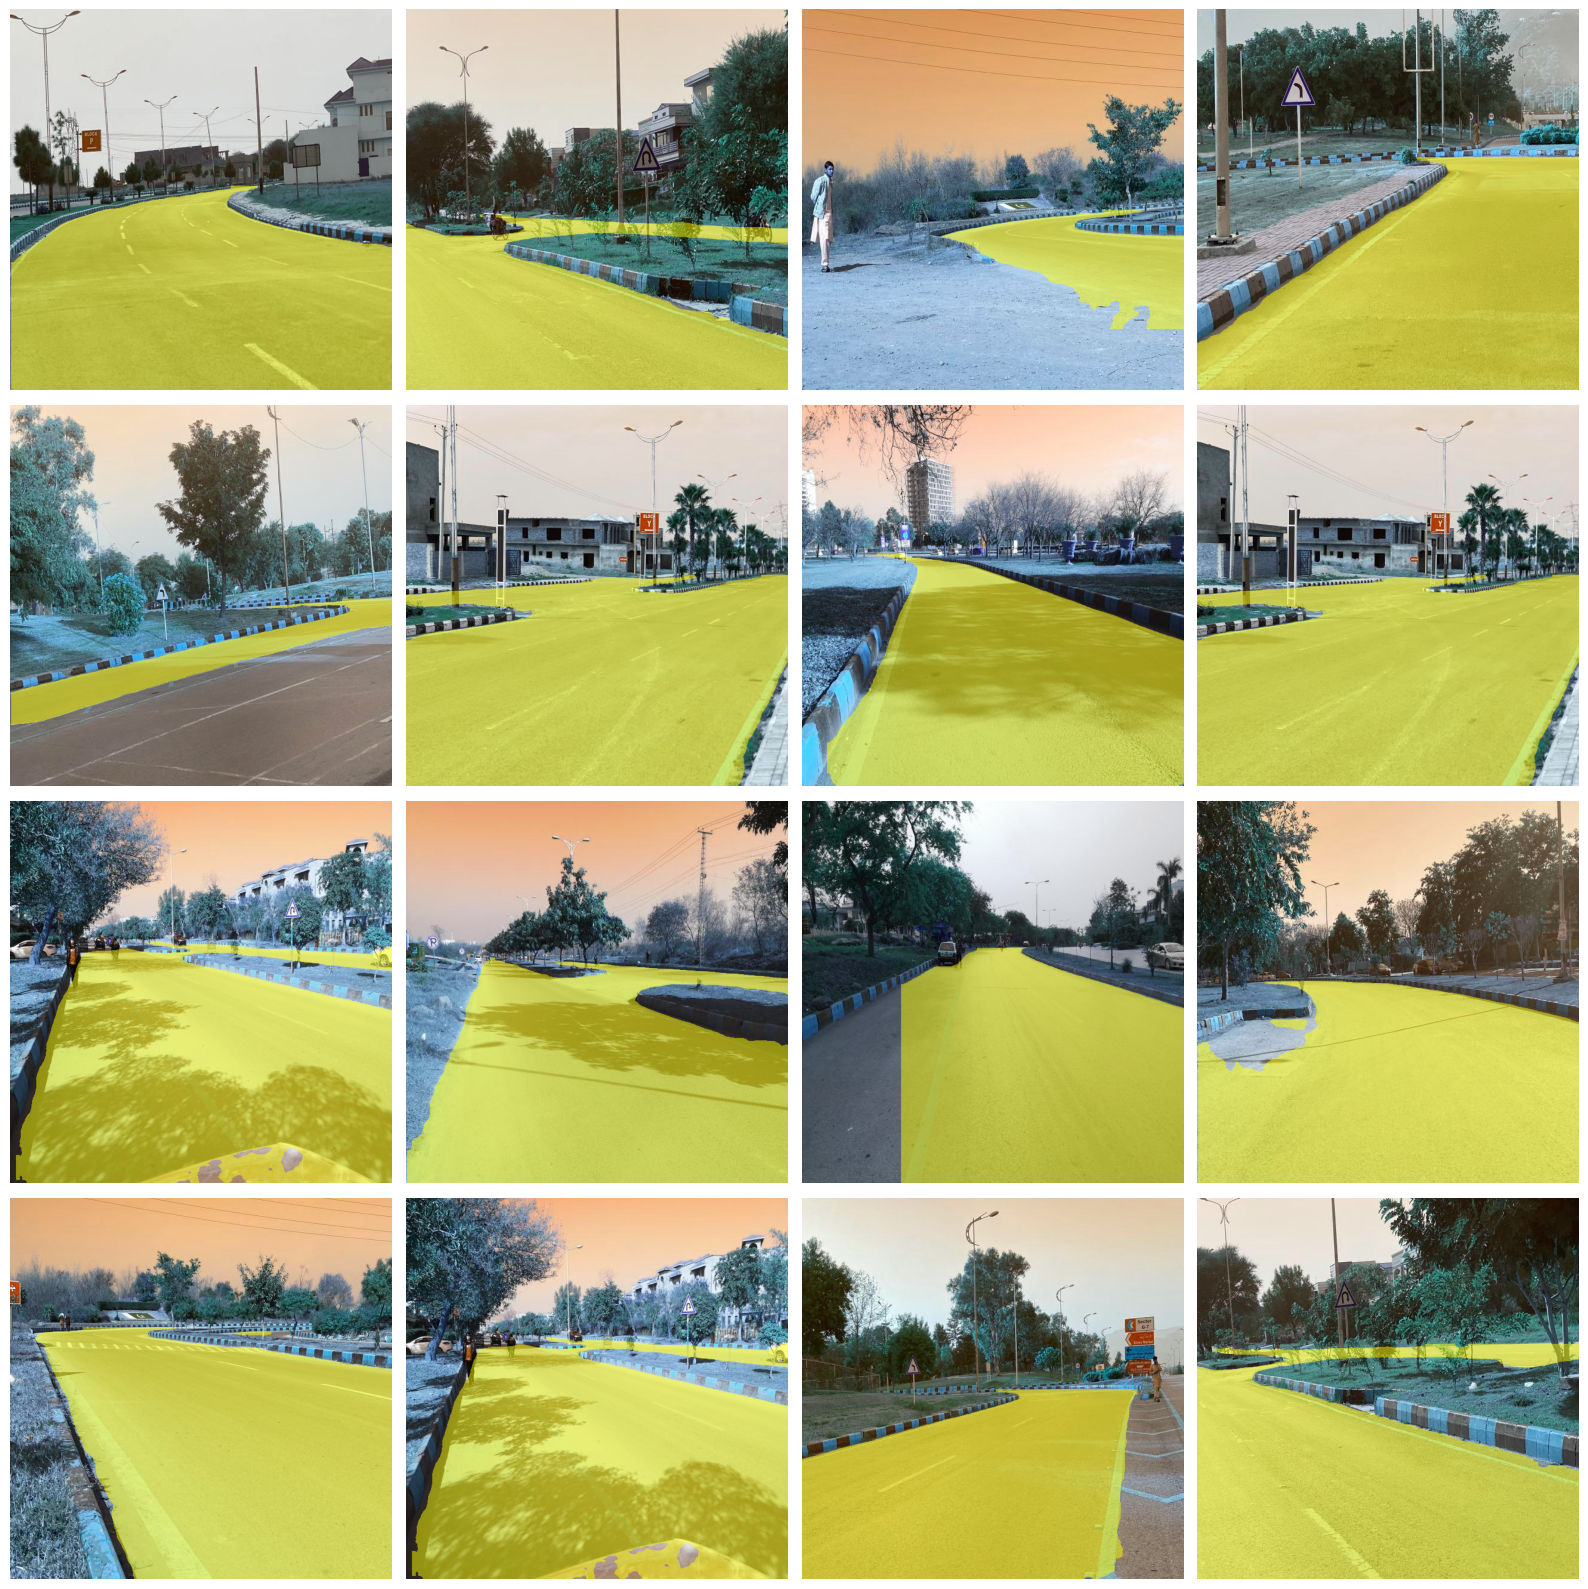

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import random

# Load trained model
model = YOLO('best.pt')
print(model.names)

# Test images directory
test_images_dir = 'Road_Segmentation_Datasets/test/images'

# Define colors for visualization
color_sample = {
    0 : (0, 0, 0),
    1 : (0, 255, 255)
}

image_files = os.listdir(test_images_dir)

# Plot settings
fig, ax = plt.subplots(4, 4, figsize=(16, 16))
ax = ax.ravel()

for idx in range(16):
    img_name = random.choice(image_files)
    img_path = os.path.join(test_images_dir, img_name)
    # print(img_path)
    image = cv2.imread(img_path)
    # Convert BGR to RGB for plotting
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform inference
    results = model(img_path)[0]
    # print(results)

    if results.masks:
      # Draw segmentation masks
      for seg in results.masks.data:
          mask = seg.cpu().numpy()
          # Print all unique pixel values in the mask
          unique_values = np.unique(mask)
          print("Unique pixel values in the mask:", unique_values)
          # Resize mask to match image dimensions
          mask_resized = cv2.resize(mask, (image.shape[1], image.shape[0]))
          image = draw_segmentation(image_rgb, mask_resized, color_sample)

    # Convert BGR to RGB for plotting
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the image
    ax[idx].imshow(image_rgb)
    ax[idx].axis('off')

plt.tight_layout()
plt.show()
